# Car Price Prediction using Multiple Linear Regression with SciKit Learn

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Importing and some clean up

In [2]:

#Import the dataset
path = '/kaggle/input/car-price-prediction/CarPrice_Assignment.csv'
df = pd.read_csv(path)

#Here im dropping columns that don't have a linear relationship to the price, i am visualziing it using a scatter chart.
df = df.drop(['carbody','symboling','doornumber','aspiration','fuelsystem', 'drivewheel', 'fueltype', 'carlength', 'carwidth', 'carheight', 'enginelocation','enginetype','cylindernumber','peakrpm','stroke','compressionratio'],axis=1)

# The .head() function prints the top 5 rows of the dataset, which is useful for seeing what our data looks like.
df.head()

,car_ID,CarName,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,88.6,2548,130,3.47,111,21,27,13495.0
1,2,alfa-romero stelvio,88.6,2548,130,3.47,111,21,27,16500.0
2,3,alfa-romero Quadrifoglio,94.5,2823,152,2.68,154,19,26,16500.0
3,4,audi 100 ls,99.8,2337,109,3.19,102,24,30,13950.0
4,5,audi 100ls,99.4,2824,136,3.19,115,18,22,17450.0


Text(0.5, 1.0, 'Horsepower to Price')

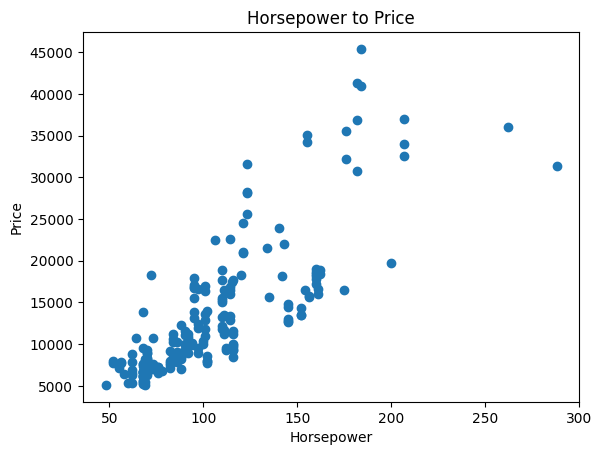

In [3]:
#Here you can replace the curbweight column with any other column that you want to visualize its relationship to the price
x = df['horsepower']
y = df['price']

plt.scatter(x,y)
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Horsepower to Price')

Using the scatter charts lets us visualize any linear relationships

# Analyzing the Data

Now that we have the data cleaned up and gotten rid of all columns that don't have a linear relationship to the price, we can start specifying our variables.

Its intresting to see that lots of the car features that I was expecting to have a relationship to the price, do not in fact have a linear relationship to the price.

So now we can look to see what columns our dataframe contains and get some info about them. 

In [4]:
print('Dataset Info:')
print(df.info())
print()
print('Dataset Columns:')
print(df.columns)
print()
print('Dataset Statistics:')
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   car_ID      205 non-null    int64  
 1   CarName     205 non-null    object 
 2   wheelbase   205 non-null    float64
 3   curbweight  205 non-null    int64  
 4   enginesize  205 non-null    int64  
 5   boreratio   205 non-null    float64
 6   horsepower  205 non-null    int64  
 7   citympg     205 non-null    int64  
 8   highwaympg  205 non-null    int64  
 9   price       205 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 16.1+ KB
None

Dataset Columns:
Index(['car_ID', 'CarName', 'wheelbase', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Dataset Statistics:
           car_ID   wheelbase   curbweight  enginesize   boreratio  \
count  205.000000  205.000000   205.000000  205.0000

As you can see from the dataset info results, we have a columns with an object datatype. In order to use this columns in our model, we will need to convert those "categorical" columns into numerical columns.

In this notebook I think i'm just going to drop the column since I don't care about the name of the car. But in other examples that contain categorical columns that you want to use as features, just remember they will need to be converted into numerical values

The .info() also lets us know of any NULL values in the data, which we don't want. But from the output, it doesn't look like we have any null values, so we can skip the part of removing all null values

We can also see that we have a total of 205 entries in this dataset, which should be enough info to get an accurate prediction.

In [5]:
#I'm also going to drop the car_ID column since an index is already generted for us

df = df.drop(['CarName','car_ID'],axis=1)
df.head()


,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,2548,130,3.47,111,21,27,13495.0
1,88.6,2548,130,3.47,111,21,27,16500.0
2,94.5,2823,152,2.68,154,19,26,16500.0
3,99.8,2337,109,3.19,102,24,30,13950.0
4,99.4,2824,136,3.19,115,18,22,17450.0


# Preparing the features and Y value

Now our data looks much better, and will be so much easier to work with. Data preparation in my opinion is one of the most crucial steps in building ML models, and somehow the most enjoyable for me.

All the previous steps could've been done in less code blocks, I wanted to jot down my thought process while building this project in order to reinforce what I know, and so others can follow along.

Lets start getting our X and y variables created. The X variable will contain all the feature we want to use to make prediction (Which are all the columns other than the price). Then we will create the y variable which is our value we want to predict, in this case, 'price'.

In [6]:
feature_columns = ['wheelbase','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']

X = df[feature_columns]
y = df['price']

print(X.head)
print(y.head)

<bound method NDFrame.head of      wheelbase  curbweight  enginesize  boreratio  horsepower  citympg  \
0         88.6        2548         130       3.47         111       21   
1         88.6        2548         130       3.47         111       21   
2         94.5        2823         152       2.68         154       19   
3         99.8        2337         109       3.19         102       24   
4         99.4        2824         136       3.19         115       18   
..         ...         ...         ...        ...         ...      ...   
200      109.1        2952         141       3.78         114       23   
201      109.1        3049         141       3.78         160       19   
202      109.1        3012         173       3.58         134       18   
203      109.1        3217         145       3.01         106       26   
204      109.1        3062         141       3.78         114       19   

     highwaympg  
0            27  
1            27  
2            26  
3        

# Splitting the data

Now its time to split our data into 'Training' and 'Testing' datasets. We will split it so we have 75% training data and 25% testing data.

We split the data so that we can train it on 75% of the data that will include the price, so once it finds a line of best fit, we will test it on the other 25% that does not include the price to see if it can make accurate prediction, we will then evaluate the model. But lets start with the splitting

You can specify the size of the split with the 'test_size' paremeter in the train_test_split function. By default its a 75-25 split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

print(X_train.head())
print(y_test.head())

     wheelbase  curbweight  enginesize  boreratio  horsepower  citympg  \
23        93.7        2128          98       3.03         102       24   
3         99.8        2337         109       3.19         102       24   
55        95.3        2380          70       3.33         101       17   
14       103.5        3055         164       3.31         121       20   
184       97.3        2264          97       3.01          52       37   

     highwaympg  
23           30  
3            30  
55           23  
14           25  
184          46  
168     9639.0
69     28176.0
174    10698.0
12     20970.0
100     9549.0
Name: price, dtype: float64


# Specifying and Fitting the model

Suprisingly, this is the easiest part of this project. Using the LinearRegression module we can easily specify our model and fit it using the .fit()

This will find the line of best fit for us, allowing us to make predictions

In [8]:
#Specify the type of model we want to use 
lrmodel = LinearRegression()

#We fit the model on the training data
lrmodel.fit(X_train,y_train)

#If you get an output like this, it successfully found the line of best fit! 

LinearRegression()

# Making Predictions

Now that we have our line of best fit, we are ready to start making predictions. We will use the .predict() function to do this.

First we will create a prediction variable to store the predicted price inside, make the prediction, and look at the actual value we were trying to predict.

Then we will run a new prediction on the testing data. 

# Evaluating the Model

This step is very important since it gives us an idea of how accurate our model is. We will use the 'Mean Absolute Error' so get the average amount the prediction is off by

In [9]:
#Here we are making predictions using the training data
prediction = lrmodel.predict(X_train)
print('Predicted Price:', prediction[0]) #This prints the first prediction row
print('Actual value:',y_train[:1]) # This is printing the actual value that we were trying to predict 


Predicted Price: 9368.90765668454
Actual value: 23    7957.0
Name: price, dtype: float64


In [10]:
#Making predictions on the test set
y_pred = lrmodel.predict(X_test)

#Calcuate the mae
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:', mae)
print()
print(X_test.head())
print('List of first 5 predictions associated with the features above:',y_pred[:5])

Mean Absolute Error: 2243.4334516119357

     wheelbase  curbweight  enginesize  boreratio  horsepower  citympg  \
168       98.4        2536         146       3.62         116       24   
69       106.7        3495         183       3.58         123       22   
174      102.4        2480         110       3.27          73       30   
12       101.2        2710         164       3.31         121       21   
100       97.2        2302         120       3.33          97       27   

     highwaympg  
168          30  
69           25  
174          33  
12           28  
100          34  
List of first 5 predictions associated with the features above: [15273.1117984  22368.16241212 10288.17720445 18384.24152823
 11520.92893672]
